# R session from Video

## Linear SVM

We generate some data in two dimensions.

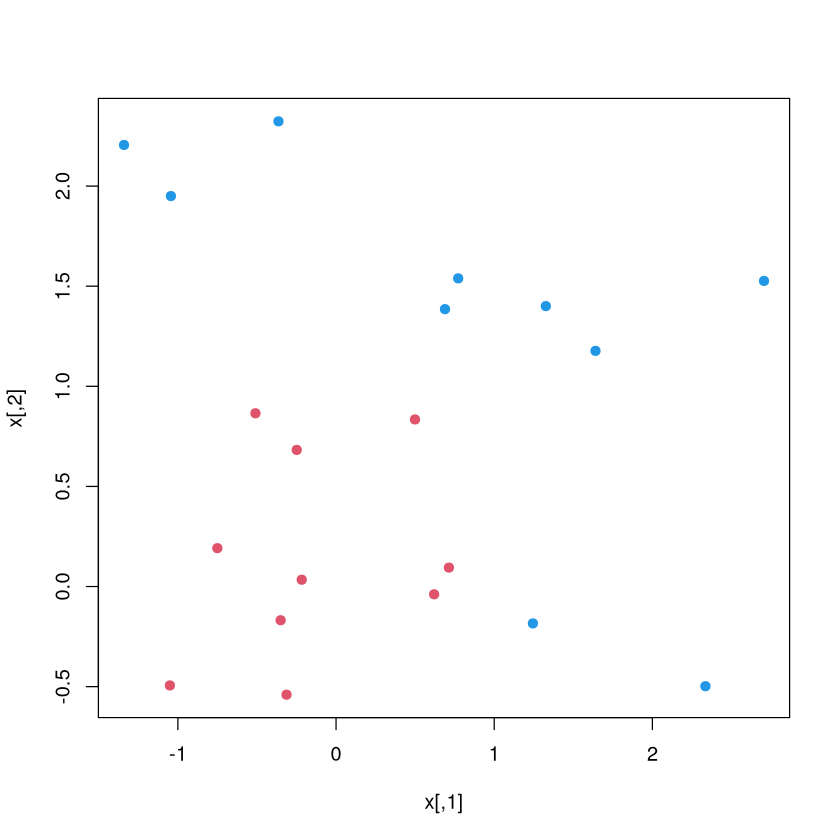

In [1]:
set.seed(10111)
x <- matrix(rnorm(40), 20, 2)
y <- rep(c(-1,1),c(10,10))
x[y==1,] <- x[y==1,]+1
plot(x, col=y+3, pch=19)

Load the library `e1071` which contains the `svm()` function.

In [2]:
library(e1071)

We will now compute the fit with a `cost` tuning parameter. We then print the details of the fit and plot. The plot however is not that good. Also notice that it plots `X2` on the horizontal which breaks convention.


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  6



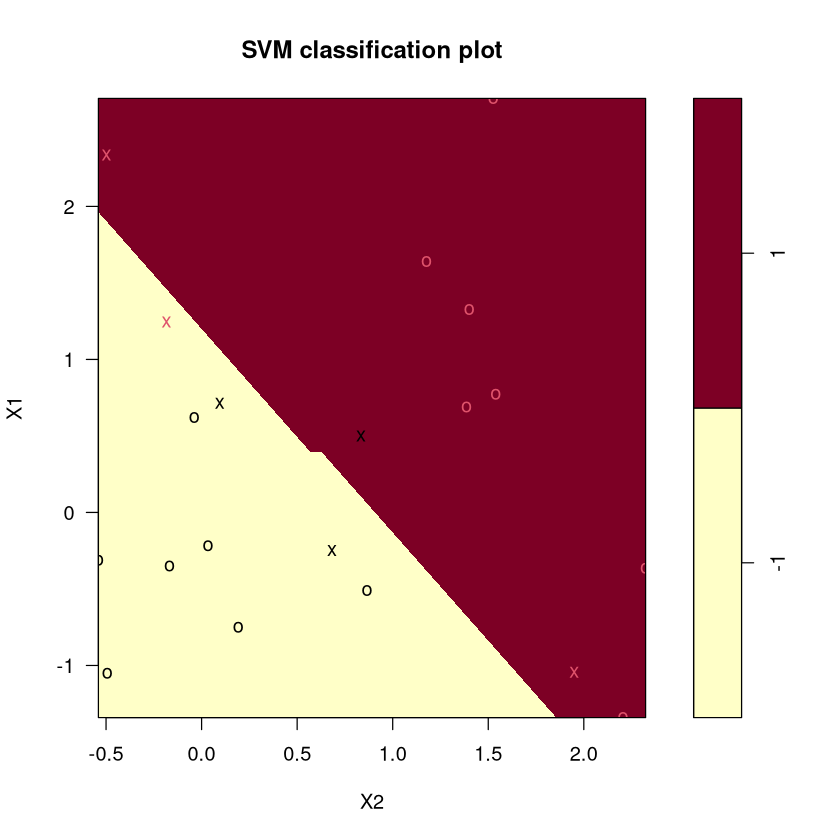

In [3]:
dat <- data.frame(x, y=as.factor(y))
svmfit <- svm(y ~ ., data=dat, kernel="linear", cost=10, scale=F)
print(svmfit)
plot(svmfit, dat)

We will come up with a method of creating our own plot:
1. Creat a grid lattice.
2. Create the predictions based on the fit and grid.
3. Plot the two classes as `red` or `blue` based on the prediction.
4. Plot the data points.
5. Show which points are the support vectors.

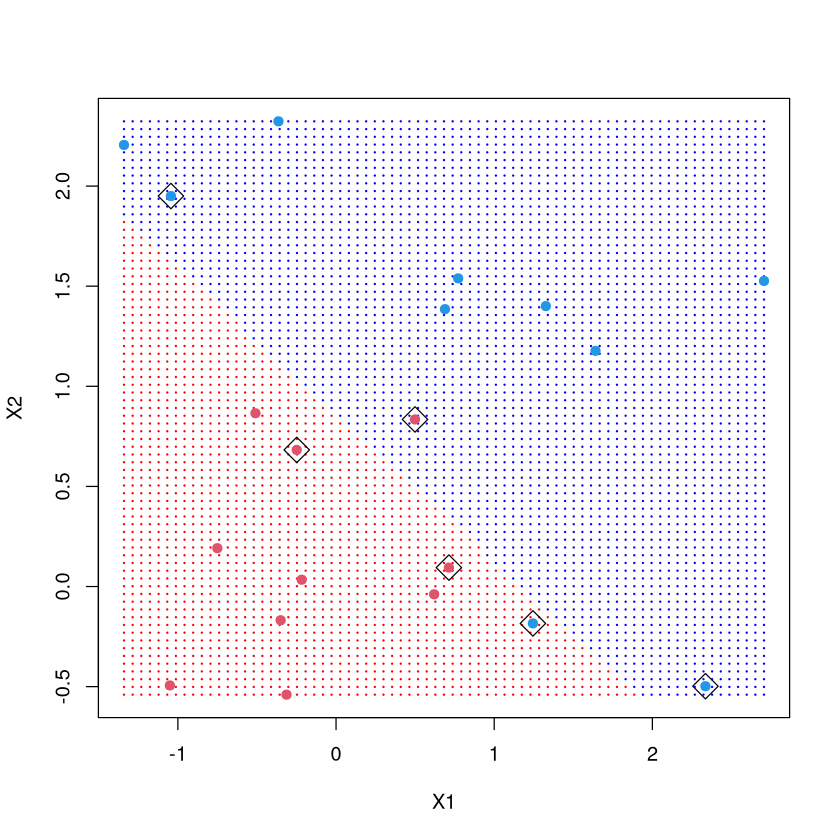

In [5]:
make.grid <- function(x, n=75) {
    grange=apply(x, 2, range)
    x1=seq(from=grange[1,1], to=grange[2,1], length=n)
    x2=seq(from=grange[1,2], to=grange[2,2], length=n)
    expand.grid(X1=x1, X2=x2)
}
# Create the grid lattice.
xgrid=make.grid(x)
# Create the predictions based on the fit and grid.
ygrid=predict(svmfit, xgrid)
# Plot the two classes as `red` or `blue` based on the prediction.
plot(xgrid, col=c("red","blue")[as.numeric(ygrid)], pch=20, cex=.2)
# Plot the data points.
points(x, col=y+3, pch=19)
# Show which points are the support vectors.
points(x[svmfit$index,], pch=5, cex=2)

Now lets show how to plot the margins.

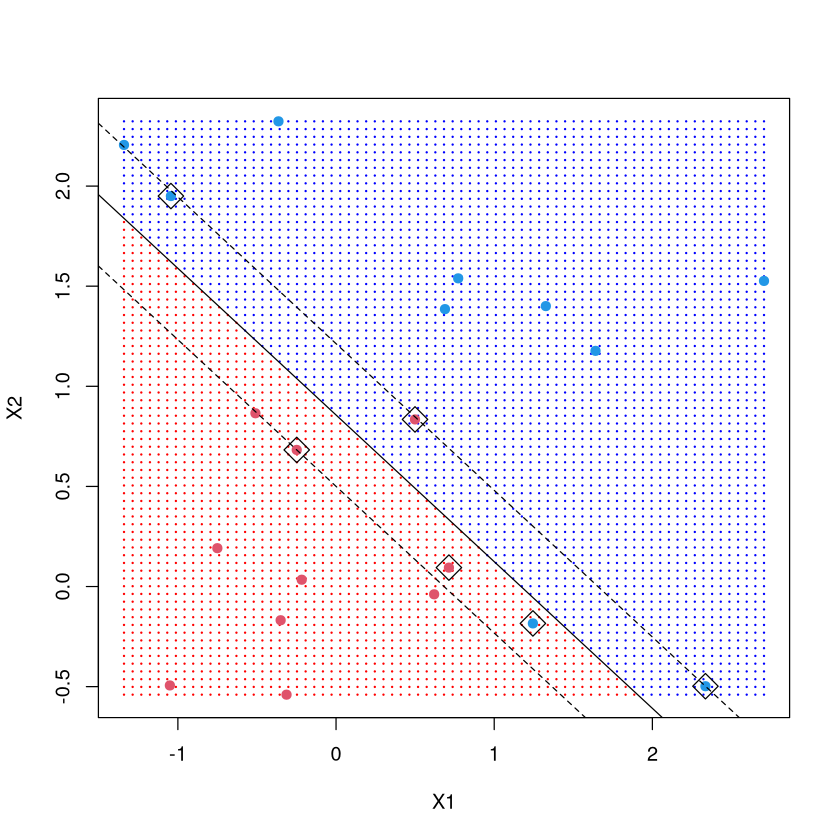

In [6]:
beta=drop(t(svmfit$coefs)%*%x[svmfit$index,])
beta0=svmfit$rho
plot(xgrid, col=c("red", "blue")[as.numeric(ygrid)], pch=20, cex=.2)
points(x, col=y+3, pch=19)
points(x[svmfit$index,], pch=5, cex=2)
abline(beta0 / beta[2], -beta[1] / beta[2])
abline((beta0-1) / beta[2], -beta[1] / beta[2], lty=2)
abline((beta0+1) / beta[2], -beta[1] / beta[2], lty=2)

## Non-linear SVM

In [7]:
load(url("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda"))
names(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

In [8]:
rm(x,y)
attach(ESL.mixture)

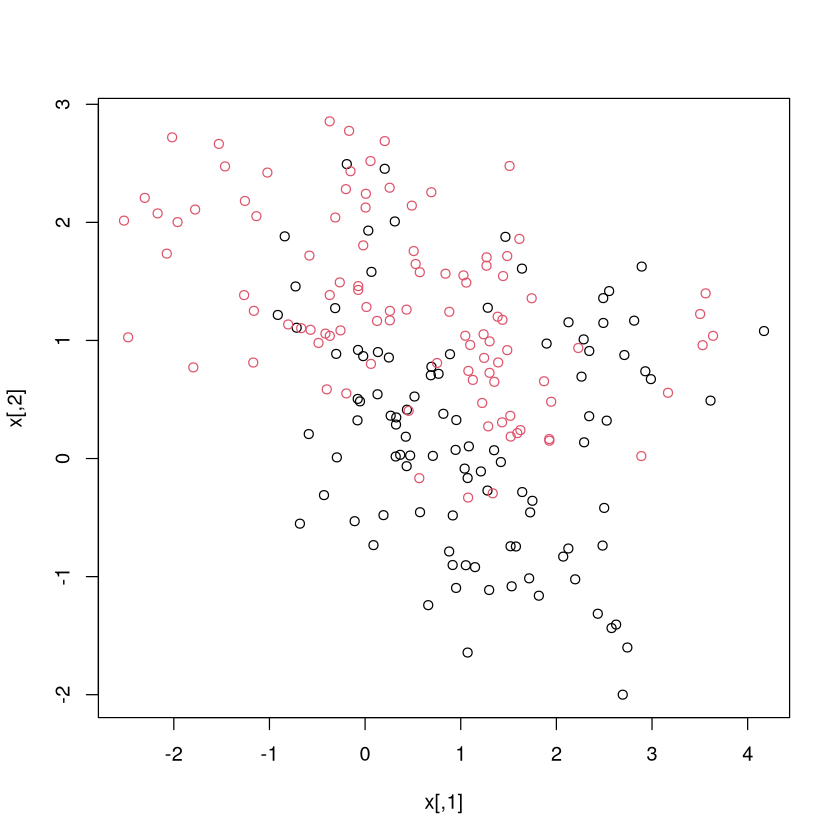

In [9]:
plot(x, col=y+1)

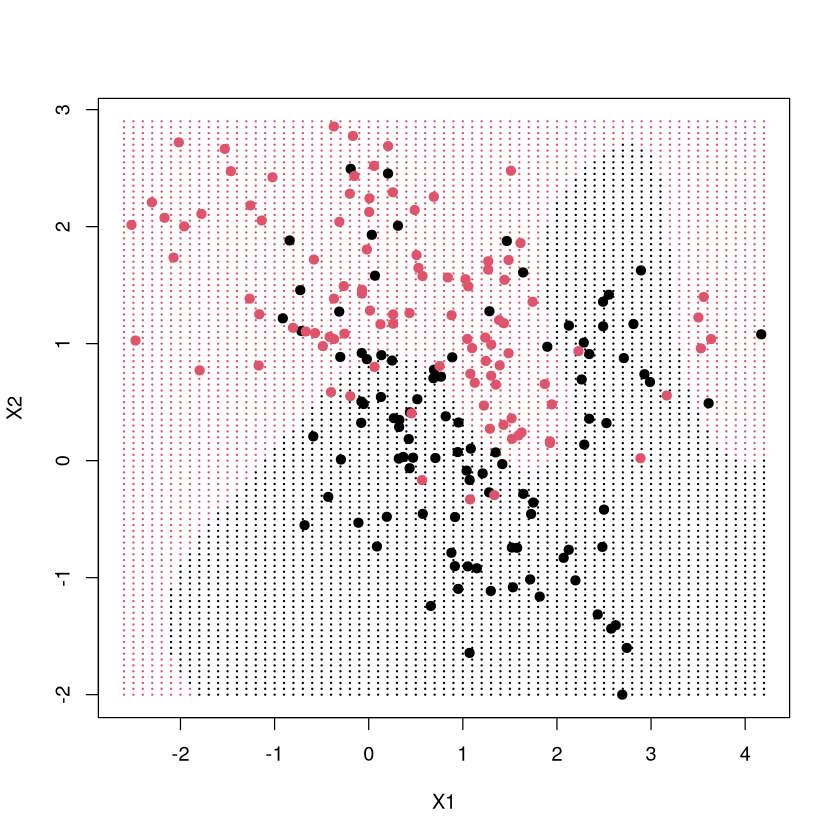

In [10]:
dat=data.frame(y=as.factor(y),x)
fit <- svm(factor(y) ~ ., data=dat, scale=F, kernel="radial", cost=5)
xgrid <- expand.grid(X1=px1, X2=px2)
ygrid <- predict(fit, xgrid)
plot(xgrid, col=as.numeric(ygrid), pch=20, cex=.2)
points(x, col=y+1, pch=19)

We can go further and have the predict function produce the actual function estimates at each of our grid points. We can include the actual decision boundary on the plot by making use of the contour function. On the dataframe is also `prob`, which is the true probability of class 1 for these data at the grid points. If we plot its 0.5 contour, that will give us the _Bayes Decision Boundary_, which is the best one could ever do.

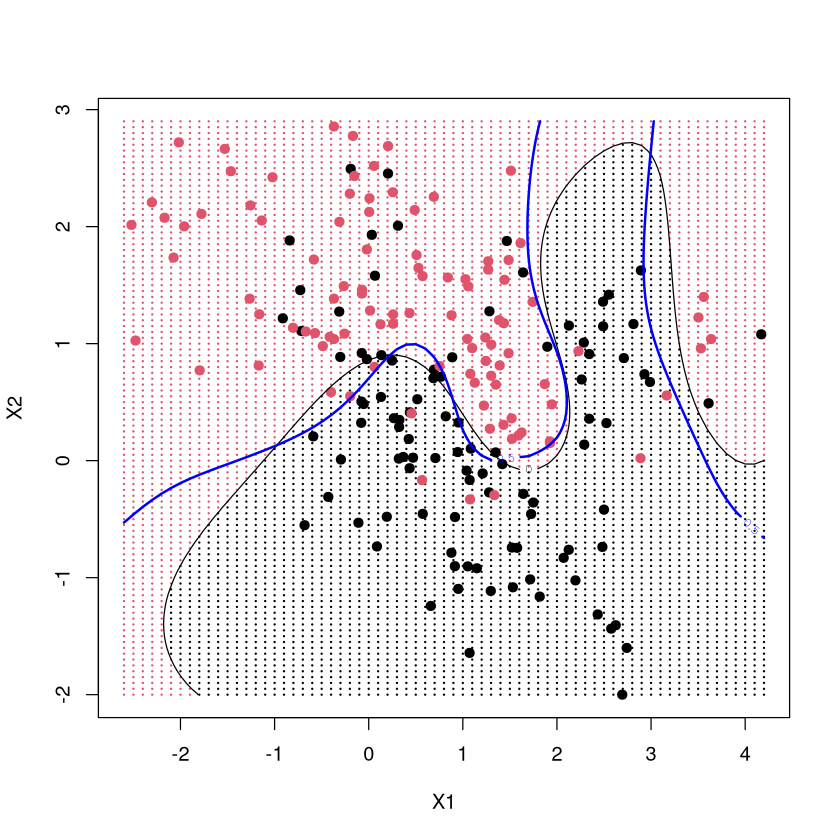

In [11]:
func=predict(fit, xgrid, decision.values=T)
func=attributes(func)$decision
plot(xgrid, col=as.numeric(ygrid), pch=20, cex=.2)
points(x, col=y+1, pch=19)
contour(px1, px2, matrix(func, 69, 99), level=0, add=T)
contour(px1, px2, matrix(prob, 69, 99), level=.5, col="blue", lwd=2, add=T)